In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import re
df = pd.read_csv('data/C2A2_data/ghcnd-stations.csv')
df[(df['LATITUDE']<-11)&(df['LATITUDE']>-13)&(df['LONGITUDE']<-76)]
#PEM00084628

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID
239,AQC00914822,-11.050,-171.0833,3.0,AS,SWAIN ISLAND,NaN,NaN,NaN
40567,PEM00084628,-12.022,-77.1140,34.4,NaN,JORGE CHAVEZ INTL,NaN,NaN,84628.0


In [2]:
#Encontrar el file correcto
import pandas as pd
states = {'OH': 'Ohio', 'KY': 'Kentucky',
          'AS': 'American Samoa',
          'NV': 'Nevada', 'WY': 'Wyoming',
          'NA': 'National', 'AL': 'Alabama',
          'MD': 'Maryland', 'AK': 'Alaska',
          'UT': 'Utah', 'OR': 'Oregon',
          'MT': 'Montana', 'IL': 'Illinois',
          'TN': 'Tennessee', 'DC': 'District of Columbia',
          'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas',
          'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii',
          'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana',
          'NJ': 'New Jersey', 'AZ': 'Arizona',
          'GU': 'Guam', 'MS': 'Mississippi',
          'PR': 'Puerto Rico', 'NC': 'North Carolina',
          'TX': 'Texas', 'SD': 'South Dakota',
          'MP': 'Northern Mariana Islands',
          'IA': 'Iowa', 'MO': 'Missouri',
          'CT': 'Connecticut', 'WV': 'West Virginia',
          'SC': 'South Carolina', 'LA': 'Louisiana',
          'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska',
          'OK': 'Oklahoma', 'FL': 'Florida',
          'CA': 'California', 'CO': 'Colorado',
          'PA': 'Pennsylvania', 'DE': 'Delaware',
          'NM': 'New Mexico', 'RI': 'Rhode Island',
          'MN': 'Minnesota', 'VI': 'Virgin Islands',
          'NH': 'New Hampshire', 'MA': 'Massachusetts',
          'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

def findFile(search, state='', binsize=400):
    """
    find file name for the area "search" and
    state "state", records outside US have state=NaN
    """
    columnsToKeep = [
        'STATEL', 'NAME', 'FILE', 'LATITUDE', 'LONGITUDE', 'ELEVATION']

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    # convert abbr. to full state name
    df['STATEL'] = df['STATE'].map(states)

    mask = (df['NAME'].str.contains(search.upper()))

    if len(state.strip()) == 2:
        mask = mask & (df['STATE'] == state.upper().strip())
    elif len(state.strip()) > 2:
        mask = mask & (df['STATEL'] == state.title().strip())
    elif len(state.strip()) == 0:
        mask = mask & (df['STATE'].isnull())

    if len(mask) > 0:
        res = df[mask]
        res['FILE'] = res['hash'].apply(
            lambda x: 'data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(binsize,x))
        res['STATEL'] = res['STATEL'].str.title()
        if len(state.strip()) >= 2:
            res = res[~res['STATE'].isnull()]
        return res[columnsToKeep]

In [3]:
findFile(search='jorge',state='',binsize=400)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,STATEL,NAME,FILE,LATITUDE,LONGITUDE,ELEVATION
153,NaN,AEROPARQUE JORGE NEWBERY,data/C2A2_data/BinnedCsvs_d400/32a7f60486d2b48...,-34.559,-58.416,5.5
1103,NaN,TTE AV JORGE HENRICH ARAUZ,data/C2A2_data/BinnedCsvs_d400/4f197636d331f94...,-14.819,-64.918,155.1
5659,NaN,JORGE CHAVEZ INTL,data/C2A2_data/BinnedCsvs_d400/7d59fca27d7a90a...,-12.022,-77.114,34.4


In [4]:
#7d59fca27d7a90aff23db8743a1ec51ad84debf2ce61d4182291170b - LIMA-PERÚ

In [5]:
DF=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/7d59fca27d7a90aff23db8743a1ec51ad84debf2ce61d4182291170b.csv')
DF.head()

,ID,Date,Element,Data_Value
0,PEM00084628,2007-01-31,TMIN,205
1,PEM00084628,2008-08-16,TMAX,198
2,PEM00084628,2012-10-26,TMIN,157
3,PEM00084628,2015-08-29,TMAX,232
4,PEM00084628,2007-01-04,TMIN,216


In [6]:
DF['Data_Value']=DF['Data_Value']/10

DF['Date']=pd.to_datetime(DF['Date'])
DF['Year']=DF['Date'].dt.year
DF['Day']=DF['Date'].dt.day
DF['Month']=DF['Date'].dt.month
DF['Month-Day']=DF['Month'].astype(str)+'-'+DF['Day'].astype(str)
#DF.head()
DF1max=DF[(DF['Year']<2015)&(DF['Element']=='TMAX')]
DF1min=DF[(DF['Year']<2015)&(DF['Element']=='TMIN')]
DF2max=DF[(DF['Year']==2015)&(DF['Element']=='TMAX')]
DF2min=DF[(DF['Year']==2015)&(DF['Element']=='TMIN')]
#DF1max

In [7]:
x_dates=np.arange('2022-01-01','2023-01-01',dtype='datetime64[D]')
x_dates=list(map(pd.to_datetime,x_dates))

df_dates=pd.DataFrame()
df_dates['Date']=x_dates
df_dates['Day']=df_dates['Date'].dt.day
df_dates['Month']=df_dates['Date'].dt.month
df_dates['Month-Day']=df_dates['Month'].astype(str)+'-'+df_dates['Day'].astype(str)
df_dates=df_dates.set_index('Month-Day')
df_dates.head()

,Date,Day,Month
Month-Day,,,
1-1,2022-01-01,1,1
1-2,2022-01-02,2,1
1-3,2022-01-03,3,1
1-4,2022-01-04,4,1
1-5,2022-01-05,5,1


In [8]:
#Máximos 2005-2014

DF1max_pt=DF1max.groupby("Month-Day").agg({"Data_Value":(np.max)})
DF1max_pt.set_axis(labels=['Tmax1'],axis=1)
DF1max_pt.head()

,Tmax1
Month-Day,
1-1,27.2
1-10,27.5
1-11,27.7
1-12,28.2
1-13,27.4


In [9]:
#Mínimos 2005-2014
DF1min_pt=DF1min.groupby("Month-Day").agg({"Data_Value":(np.max)})
DF1min_pt.set_axis(labels=['Tmin1'],axis=1)
DF1min_pt.head()

,Tmin1
Month-Day,
1-1,21.0
1-10,21.6
1-11,21.9
1-12,21.7
1-13,21.8


In [10]:
#Máximos del 2015
DF2max_pt=DF2max.groupby("Month-Day").agg({"Data_Value":(np.max)})
DF2max_pt.set_axis(labels=['Tmax2015'],axis=1)
DF2max_pt.head()

,Tmax2015
Month-Day,
1-1,25.2
1-11,26.9
1-12,26.0
1-13,26.2
1-15,26.3


In [11]:
#Mínimos 2015
DF2min_pt=DF2min.groupby("Month-Day").agg({"Data_Value":(np.max)})
DF2min_pt.set_axis(labels=['Tmin2015'],axis=1)
DF2min_pt.head()

,Tmin2015
Month-Day,
1-1,19.9
1-12,20.9
1-13,20.8
1-15,19.0
1-16,20.9


In [12]:
#Combinando datasets
DFF=df_dates.merge(DF1max_pt,how='left',left_index=True, right_index=True).merge(DF1min_pt,how='left',left_index=True, right_index=True).merge(DF2max_pt,how='left',left_index=True, right_index=True).merge(DF2min_pt,how='left',left_index=True, right_index=True)
DFF.head()

,Date,Day,Month,Tmax1,Tmin1,Tmax2015,Tmin2015
Month-Day,,,,,,,
1-1,2022-01-01,1,1,27.2,21.0,25.2,19.9
1-2,2022-01-02,2,1,27.0,20.3,NaN,20.0
1-3,2022-01-03,3,1,26.1,20.7,NaN,18.7
1-4,2022-01-04,4,1,26.9,21.6,26.0,NaN
1-5,2022-01-05,5,1,26.5,21.4,25.3,NaN


In [13]:
#Mapa del Perú
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'7d59fca27d7a90aff23db8743a1ec51ad84debf2ce61d4182291170b')

In [14]:
#Varianbles para el Line Plot
x=DFF['Date']
x=list(map(pd.to_datetime,x))

DFF['Tmax1']=pd.to_numeric(DFF['Tmax1'])
ymax=DFF['Tmax1']
ymax=list(map(pd.to_numeric,ymax))

DFF['Tmin1']=pd.to_numeric(DFF['Tmin1'])
ymin=DFF['Tmin1']
ymin=list(map(pd.to_numeric,ymin))
ymin

[21.0,
 20.300000000000001,
 20.699999999999999,
 21.600000000000001,
 21.399999999999999,
 21.600000000000001,
 21.699999999999999,
 21.0,
 21.600000000000001,
 21.600000000000001,
 21.899999999999999,
 21.699999999999999,
 21.800000000000001,
 21.699999999999999,
 22.0,
 22.600000000000001,
 21.5,
 22.600000000000001,
 21.5,
 21.899999999999999,
 22.0,
 21.800000000000001,
 21.699999999999999,
 21.600000000000001,
 22.0,
 23.0,
 22.0,
 22.800000000000001,
 21.899999999999999,
 21.0,
 21.800000000000001,
 21.5,
 20.800000000000001,
 22.199999999999999,
 22.0,
 21.5,
 21.899999999999999,
 21.800000000000001,
 22.600000000000001,
 24.100000000000001,
 21.699999999999999,
 22.5,
 21.5,
 22.0,
 21.800000000000001,
 22.5,
 22.800000000000001,
 21.899999999999999,
 21.699999999999999,
 23.399999999999999,
 22.5,
 21.699999999999999,
 21.600000000000001,
 21.699999999999999,
 21.699999999999999,
 21.699999999999999,
 21.0,
 20.800000000000001,
 21.600000000000001,
 21.899999999999999,
 21.5,

<IPython.core.display.Javascript object>


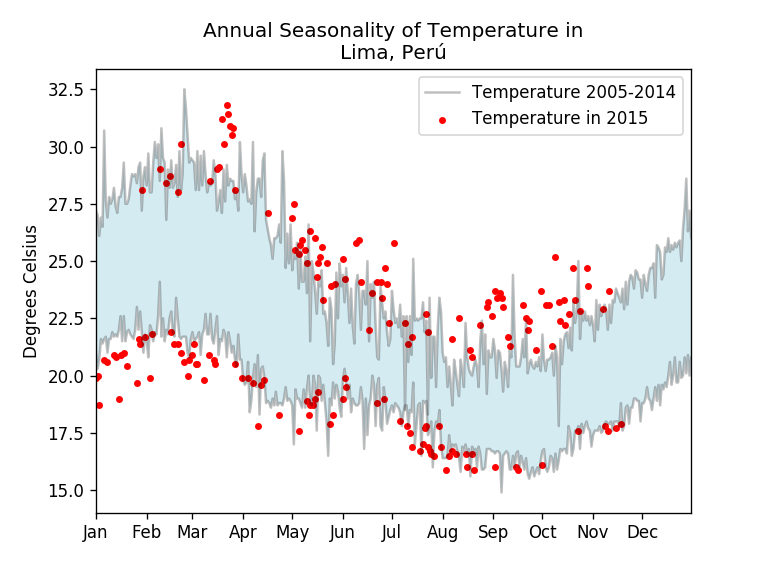

In [15]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure()
plt.plot(x,ymax,'-',c='black',alpha=0.25,label='Temperature 2005-2014')
plt.plot(x,ymin,'-',c='black',alpha=0.25)

In [16]:
plt.gca().fill_between(x,ymin,ymax,facecolor='lightblue',alpha=0.50)

In [17]:
import matplotlib.dates as mdates
from datetime import datetime
myFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
#days = mdates.DayLocator()

ax=plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_minor_locator(days)

datemin = datetime.date(df_dates['Date'][0]) 
datemax = datetime.date(df_dates['Date'][364])
ax.set_xlim(datemin, datemax)

#ax.xaxis.set_major_formatter(myFmt)
#plt.xticks(range('2022-01-01', '2022-12-31', 31))

(738156.0, 738520.0)

In [18]:
#Creando nuevo dataset para Scatterplot

#Filtrando Máximos y Mínimos del 2015
DFF['2015max']=np.where(DFF['Tmax2015']>DFF['Tmax1'],'Yes','No')
DFF['2015min']=np.where(DFF['Tmin2015']<DFF['Tmin1'],'Yes','No')
DFF.head()

,Date,Day,Month,Tmax1,Tmin1,Tmax2015,Tmin2015,2015max,2015min
Month-Day,,,,,,,,,
1-1,2022-01-01,1,1,27.2,21.0,25.2,19.9,No,Yes
1-2,2022-01-02,2,1,27.0,20.3,NaN,20.0,No,Yes
1-3,2022-01-03,3,1,26.1,20.7,NaN,18.7,No,Yes
1-4,2022-01-04,4,1,26.9,21.6,26.0,NaN,No,No
1-5,2022-01-05,5,1,26.5,21.4,25.3,NaN,No,No


In [19]:
#Creando 2 datasets para máximos 2015 y mínimos 2015
DF2015max=DFF[DFF['2015max']=='Yes']
DF2015max = DF2015max.rename(columns={DF2015max.columns[5]: '2015sc_max'})
DF2015max = DF2015max[['2015sc_max','2015max']]
DF2015max

DF2015min=DFF[DFF['2015min']=='Yes']
DF2015min = DF2015min.rename(columns={DF2015min.columns[6]: '2015sc_min'})
DF2015min = DF2015min[['2015sc_min','2015min']]
DF2015min.head()
#DF2015max

,2015sc_min,2015min
Month-Day,,
1-1,19.9,Yes
1-2,20.0,Yes
1-3,18.7,Yes
1-6,20.7,Yes
1-8,20.6,Yes


In [20]:
#Combinando data set para scatterplot
DF_sp=df_dates.merge(DF2015max,how='left',left_index=True, right_index=True).merge(DF2015min,how='left',left_index=True, right_index=True)
DF_sp.head()

,Date,Day,Month,2015sc_max,2015max,2015sc_min,2015min
Month-Day,,,,,,,
1-1,2022-01-01,1,1,NaN,NaN,19.9,Yes
1-2,2022-01-02,2,1,NaN,NaN,20.0,Yes
1-3,2022-01-03,3,1,NaN,NaN,18.7,Yes
1-4,2022-01-04,4,1,NaN,NaN,NaN,NaN
1-5,2022-01-05,5,1,NaN,NaN,NaN,NaN


In [21]:
#Creando las listas Y para el Scatterplot
sc_ymax=DF_sp['2015sc_max']
sc_ymax=list(map(pd.to_numeric,sc_ymax))

sc_ymin=DF_sp['2015sc_min']
sc_ymin=list(map(pd.to_numeric,sc_ymin))

In [22]:
#Graficando el scatterplot
plt.scatter(x,sc_ymax,s=10,c='red',label='Temperature in 2015')
plt.scatter(x,sc_ymin,s=10,c='red')
plt.legend(loc=1)
plt.title('Annual Seasonality of Temperature in\nLima, Perú')
plt.ylabel('Degrees Celsius')